In [172]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [173]:
#reading the data
# copy it in df so that original data is safe .

loan_data = pd.read_csv("loan.csv")

df = loan_data

In [174]:
## Step 3:- The head() method returns a specified number of rows, string from the top

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [175]:
## Step 4:- 
#When it comes to the analysis of data and its variants, it is extremely important to realize the volume of data. 
#That is, before we plan to analyze the data and perform synthesis on it, we need to be aware of the dimensions of the data.
#This is when the Python shape() method comes into the picture.


df.shape

(39717, 111)

In [176]:
# Step 5 :-
# to know the null values in data base , returns the number of missing values in the dataset.


df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Let's remove columns with all null values

In [178]:
# Step 6:- 

# We have to remove the null/missing values
# DROPNA ()- The dropna() method removes the rows that contains NULL values. 
# The dropna() method returns a new DataFrame object unless the inplace parameter is set to True.
# When using the dropna() method, the axis, how, and inplace parameters can be specified as follows:
# HOW:- Optional, default 'any'. Specifies whether to remove the row or column when ALL values are NULL, or if ANY value is NULL.


df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Removing single valued columns

In [180]:
df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which some correspond to the post approval of loan
- The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


- So we can safely remove the columns / variables which are not needed for this scenario.
- Also remove those columns which doesnt contribute to the identify loan defaulting such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
  
- "desc" no need
- "out_prncp_inv" , "total_pymnt_inv " are not useful contributing to the loan defaulting analysis. So removing them. 


In [182]:
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [183]:
df.shape

(39717, 21)

In [184]:
# It returns an Index object representing the names of the columns in the DataFrame.

df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

###  The aim is to identify patterns which indicate if a person is likely to default and this can only be identified in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- so removing them

In [186]:
#unique() function is used to extract the unique values from a Series (a single column) or a DataFrame (multiple columns).



df_defaulter = df[df.loan_status != "Current"]
df_defaulter.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values in current DF_DEFAULTER

In [188]:
# Percentage of missing values
# Identification of Missing values


(df_defaulter.isna().sum()/len(df_defaulter.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

## Handling Missing values
 - Missing Values Column --> "emp_length", "revol_util".
 - emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

# Strategy:  
 - Column Data type we have to find out

In [190]:
df_defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

In [191]:
# For categorical columns we prefer to use mode.
# mode is not coming directly its coming with a index. So to fetch the value we need to pass the value with index.
# . value_counts() method is a convenient way to count the number of occurrences of each unique value
# the mode is the value that is repeatedly occurring in a given set


print("Mode : " + df_defaulter.emp_length.mode()[0])
df_defaulter.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### The above value counts shows that the mode value has far higher frequency or appears more frequently,than that of the next most frequent value. 
- replace/impute all missing values with the value of mode.

In [193]:
# Fillna function will replace/impute all missing values of emp_length column with mode value i.e. '10'
# isna() method checks whether the objects of a Dataframe or a Series contain missing or null values (NA, NaN) 


df_defaulter.emp_length.fillna(df_defaulter.emp_length.mode()[0], inplace = True)
df_defaulter.emp_length.isna().sum()

0

In [194]:
# subset parameter in the dropna() function allows you to specify the columns where you want to check for missing values.
# dropna() method removes the rows that contains NULL values.


df_defaulter.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df_defaulter.revol_util.isna().sum()

0

## Standardizing the data 
- "revol_util" column although described as an object column, it has continous values(Continuous variables contain measurements with decimal precision). 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable. 

In [196]:
df_defaulter.revol_util = pd.to_numeric(df_defaulter.revol_util.apply(lambda x : x.split('%')[0]))

In [197]:
df_defaulter.int_rate = pd.to_numeric(df_defaulter.int_rate.apply(lambda x : x.split('%')[0]))

In [198]:
df_defaulter.emp_length = pd.to_numeric(df_defaulter.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

## Treating Outlier

<Axes: ylabel='annual_inc'>

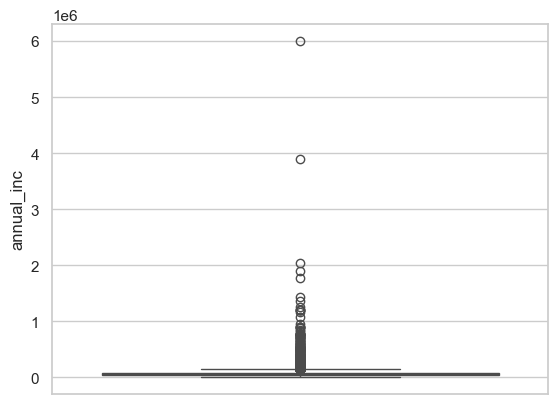

In [200]:
sns.boxplot(df_defaulter['annual_inc'])

#### There are outliers present.
- So, Removing them.
- Detecting outliers using quantile ranges
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [202]:
quantile_info = df_defaulter.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [203]:
per_95_annual_inc = df_defaulter['annual_inc'].quantile(0.95)
df_defaulter = df_defaulter[df_defaulter.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

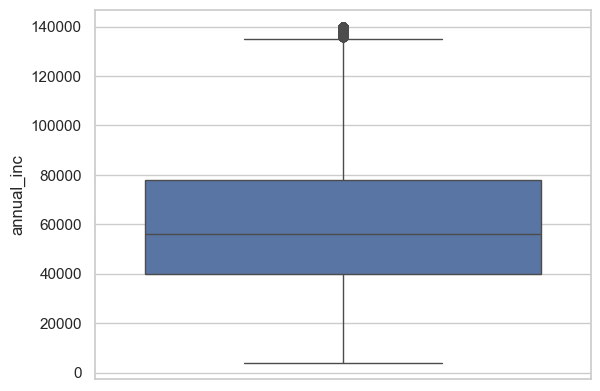

In [204]:
# After cleaning OUTLINER

sns.boxplot(df_defaulter.annual_inc)

### Now the "annual_inc" data is fine
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt

In [206]:
df_defaulter.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


<Axes: ylabel='dti'>

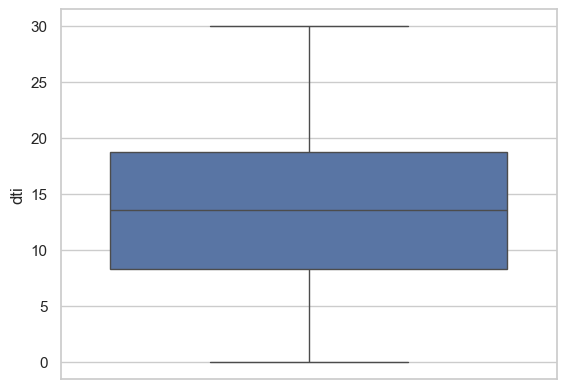

In [207]:
sns.boxplot(df_defaulter.dti)

<Axes: ylabel='loan_amnt'>

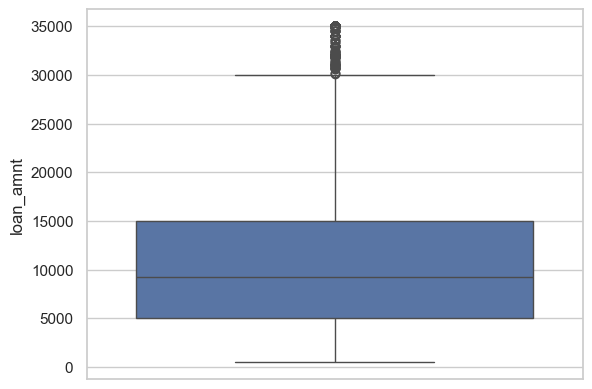

In [208]:
sns.boxplot(df_defaulter.loan_amnt)

In [209]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    22000.0
0.950    25000.0
0.970    30000.0
0.975    30000.0
0.980    31468.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [210]:
#removing OUtliner from loan_amnt

per_95_loan_amnt = df_defaulter['loan_amnt'].quantile(0.95)
df_defaulter = df_defaulter[df_defaulter.annual_inc <= per_95_annual_inc]

<Axes: ylabel='loan_amnt'>

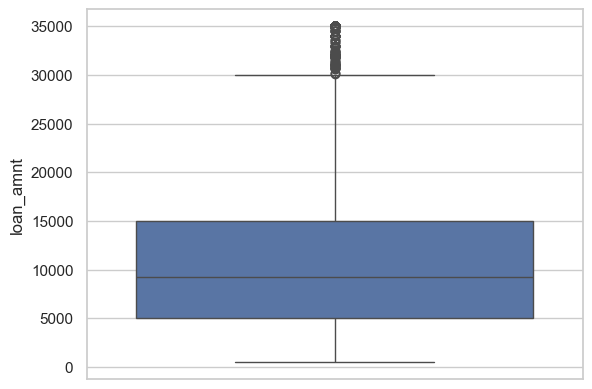

In [211]:
#after removing outliner loan_amnt box plot

sns.boxplot(df_defaulter.loan_amnt)

In [212]:
#Extract necessary columns which might impact the target columns i.e. Feature selection
df_defaulter=df_defaulter.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose','dti')]
df_defaulter.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti
0,5000,36 months,10.65,B,10,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65
1,2500,60 months,15.27,C,0,RENT,30000.0,Dec-11,Charged Off,car,1.00
2,2400,36 months,15.96,C,10,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72
3,10000,36 months,13.49,C,10,RENT,49200.0,Dec-11,Fully Paid,other,20.00
5,5000,36 months,7.90,A,3,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20


In [213]:
#create new column YEAR from the existing column
df_defaulter['year'] = df_defaulter['issue_d'].apply(lambda x:x.split('-')[1])
df_defaulter.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,year
0,5000,36 months,10.65,B,10,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,11
1,2500,60 months,15.27,C,0,RENT,30000.0,Dec-11,Charged Off,car,1.00,11
2,2400,36 months,15.96,C,10,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,11
3,10000,36 months,13.49,C,10,RENT,49200.0,Dec-11,Fully Paid,other,20.00,11
5,5000,36 months,7.90,A,3,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,11


In [214]:
#convert the data type from string to int and check the type

df_defaulter['year']=df_defaulter['year'].astype(int)
type(df_defaulter['year'][0])

numpy.int64

## Univariate Analysis

- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots


<Axes: xlabel='loan_status', ylabel='count'>

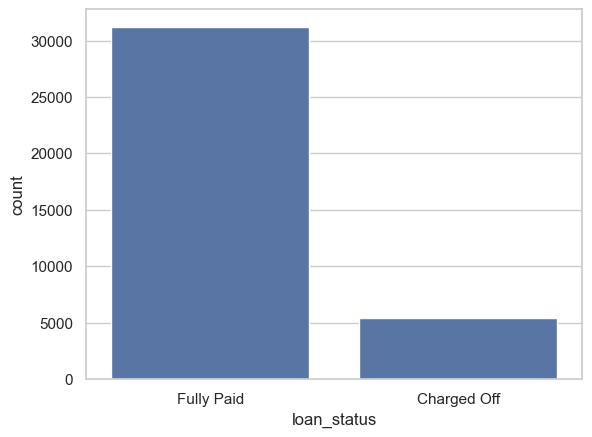

In [216]:
sns.countplot(x = 'loan_status', data = df_defaulter)

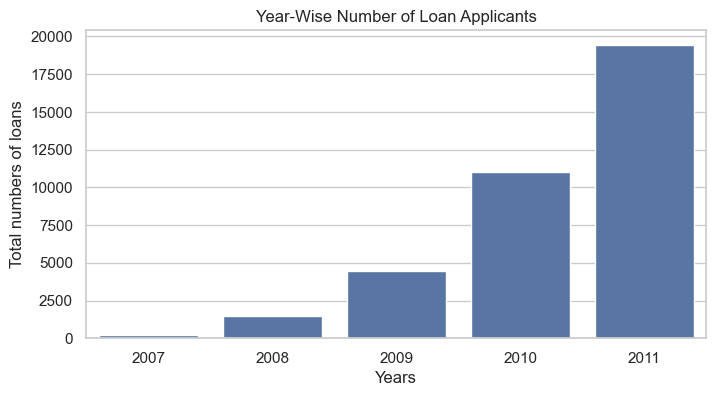

In [217]:
#draw a countplot to show the year wise increasing amount of loans in lending clubs 

plt.figure(figsize=(8,4))
sns.set(style="whitegrid")
ax=sns.countplot(x='year',data=df_defaulter)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total numbers of loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

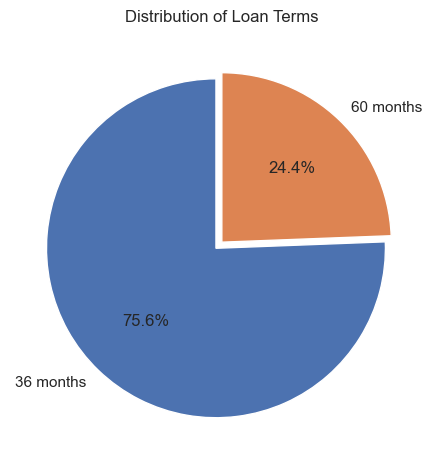

In [218]:
plt.title('Distribution of Loan Terms')  
term_counts = df_defaulter.term.value_counts()
plt.pie(x=term_counts, autopct='%1.1f%%', startangle=90, explode=(0.05, 0), labels=['36 months', '60 months'])
plt.ylabel('')  
plt.tight_layout()
plt.show()

### In this univariate analysis , Substantial growth between 2007-2011 in the number of loan applicants

In [220]:
#create new column from the existing column
df_defaulter['month'] = df_defaulter['issue_d'].apply(lambda x:x.split('-')[0])
df_defaulter.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,year,month
0,5000,36 months,10.65,B,10,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,11,Dec
1,2500,60 months,15.27,C,0,RENT,30000.0,Dec-11,Charged Off,car,1.00,11,Dec
2,2400,36 months,15.96,C,10,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,11,Dec
3,10000,36 months,13.49,C,10,RENT,49200.0,Dec-11,Fully Paid,other,20.00,11,Dec
5,5000,36 months,7.90,A,3,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,11,Dec


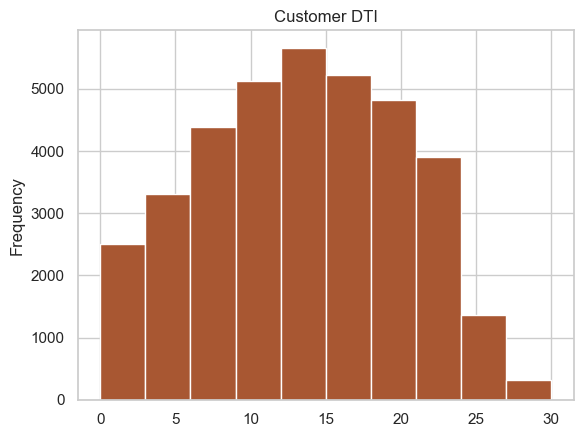

In [221]:
# Univariate analysis of DTI

plt.title('Customer DTI')
plt.xlabel("DTI Ratio")
df_defaulter.dti.plot.hist(color ="#a85732")
plt.show()

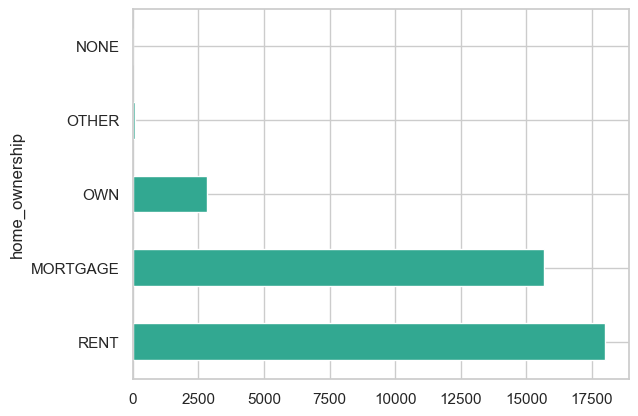

In [222]:
# Univariate analysis "Home Ownership" of borrower

df_defaulter.home_ownership.value_counts().plot.barh(color="#32a891")
plt.show()

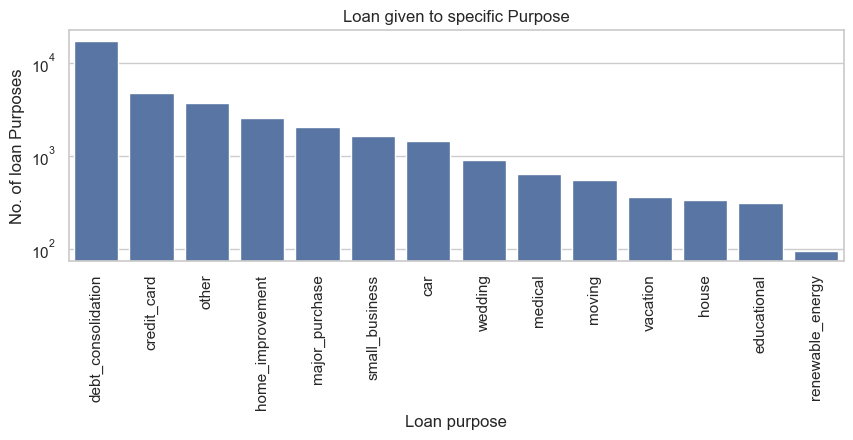

In [223]:
#Count plot to show the different loan purpose from the lending clubs

plt.figure(figsize=(10,3))
ax = sns.countplot(x='purpose',data=df_defaulter,order=df_defaulter['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Loan given to specific Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

### The five major purposes of Loan applications  are - ‘debt_consolidation’ , ‘credit_card’ , ‘other’ , ‘home_improvement’ & ‘major_purchase’

### debt_consolidation’ is the highest loan purpose 


<Figure size 1600x700 with 0 Axes>

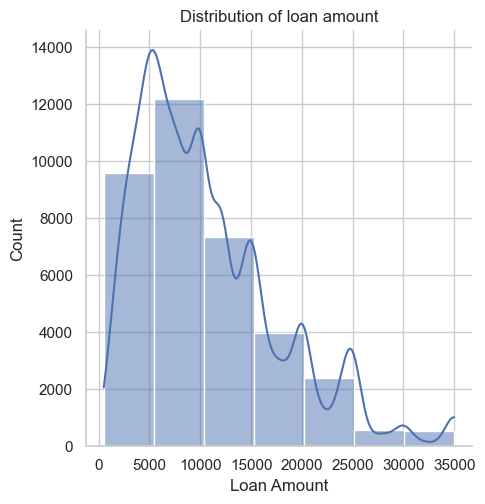

In [225]:
#loan amount distribution

plt.figure(figsize=(16,7))
ax=sns.displot(df_defaulter['loan_amnt'],bins=7,color='b', kde=True)
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

### The distribution of loan amount i.e the amount of loan applied can be visualized from the above plot .  It has been observed that the maximum loan range amount is between 5000-10000


In [227]:
df_defaulter.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'purpose',
       'dti', 'year', 'month'],
      dtype='object')

<Axes: xlabel='dti', ylabel='Density'>

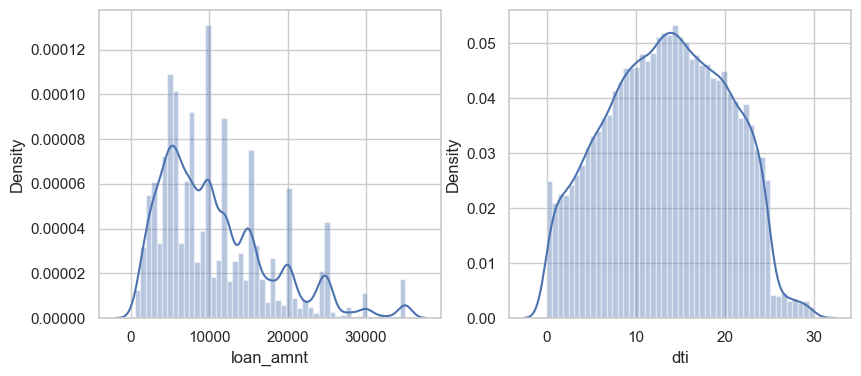

In [228]:
#setting figure size of plot
plt.figure(figsize=(15,4))

#subplot index
plt.subplot(1,3,1)

#Distribution plot
sns.distplot(df_defaulter['loan_amnt'])

#subplot index
plt.subplot(1,3,2)

#Distribution plot
sns.distplot(df_defaulter['dti'])


emp_length
10    8898
0     4315
2     4096
3     3820
4     3194
5     3040
1     3037
6     2070
7     1641
8     1342
9     1153
Name: count, dtype: int64


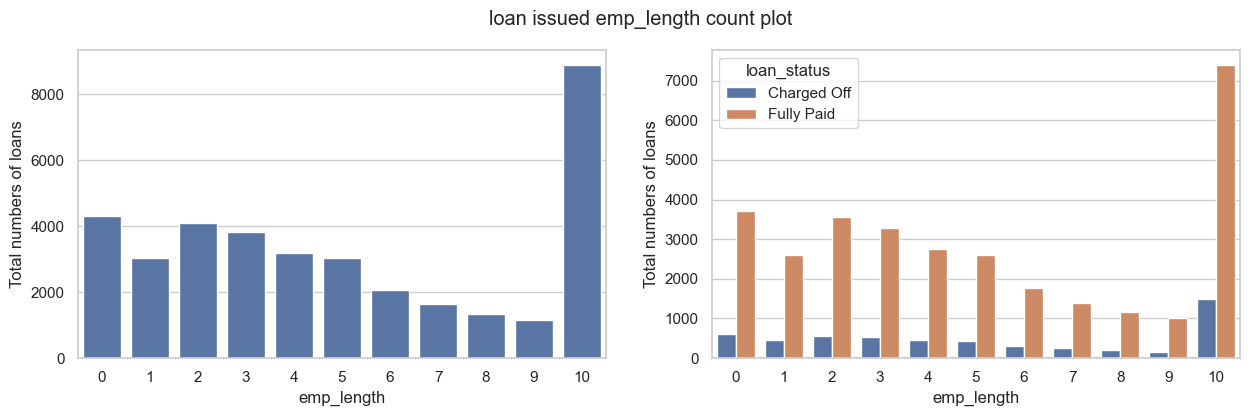

In [229]:
# count plot for emp_length and 

print(df_defaulter['emp_length'].value_counts())
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.countplot(data=df_defaulter,x=df_defaulter['emp_length'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=df_defaulter,x='emp_length',hue='loan_status')
plt.suptitle('loan issued emp_length count plot')

plt.ylabel('Total numbers of loans')
plt.show()

#### By doing bivariate analysis it has been observed that the employee exp. With 10+ years is taking more amount of loan and those who are less than 1 year is taken less amount of loan.-
1) Major borrowers are from more then 10 years experience employee.

2) More thne 10 years employee charged off in majority.

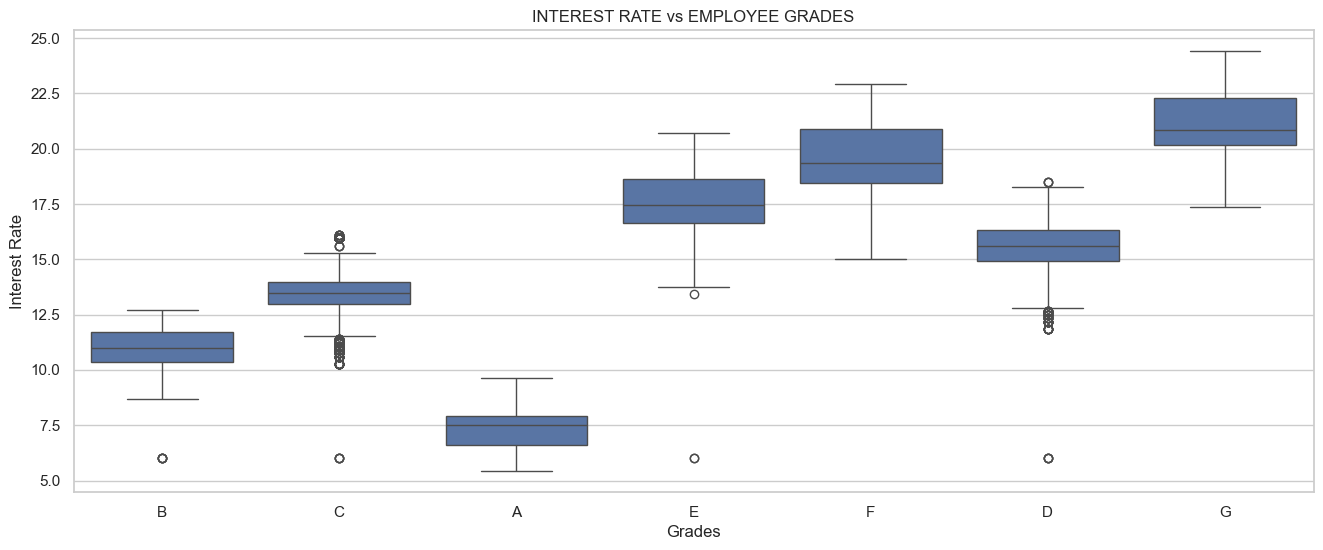

In [231]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='grade',y='int_rate',data=df_defaulter,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

### From the above plot it has been visualize that based on grade interest rate is going higher – “A”  is having minimum interest rate, whereas “B” is having higher interest rate.

In [233]:
grade_group = df_defaulter.groupby('grade')
grade_group['int_rate'].median()


grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.43
F    19.36
G    20.85
Name: int_rate, dtype: float64

In [234]:

emp_group = df_defaulter.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
0      7750.0
1      8000.0
2      8000.0
3      9000.0
4      9600.0
5      9600.0
6     10000.0
7     10000.0
8     10000.0
9     10000.0
10    10000.0
Name: loan_amnt, dtype: float64

In [235]:
### Segmented Univariate Analysis

In [236]:
## Deriving a new column with segments for the int_rate column using pd.qcut

df_defaulter['int_rate_segments'] = pd.qcut(x=df_defaulter.int_rate, q=[0, 0.33, 0.66, 1], labels=["Low", "Medium", "High"])

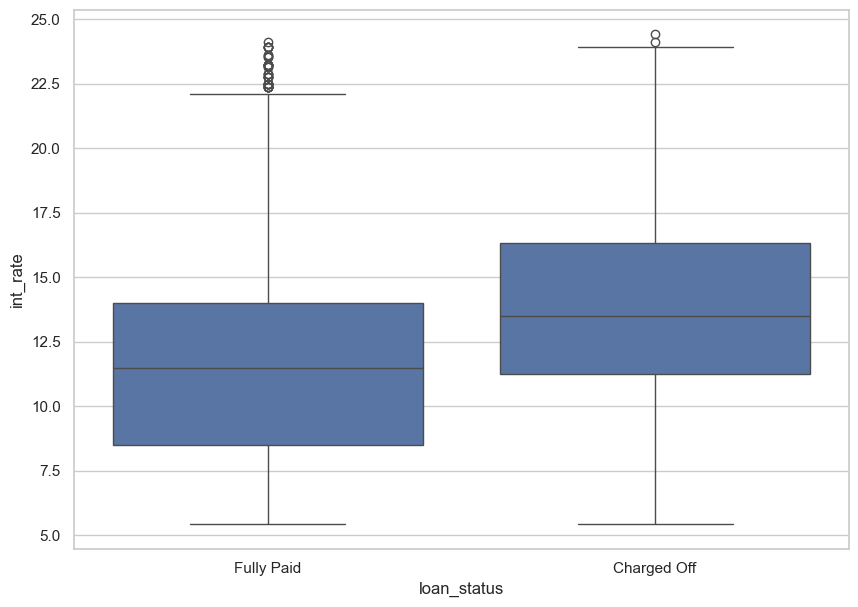

In [237]:
plt.figure(figsize=[10,7])
sns.boxplot(data=df_defaulter, y="int_rate" , x="loan_status")
plt.show()

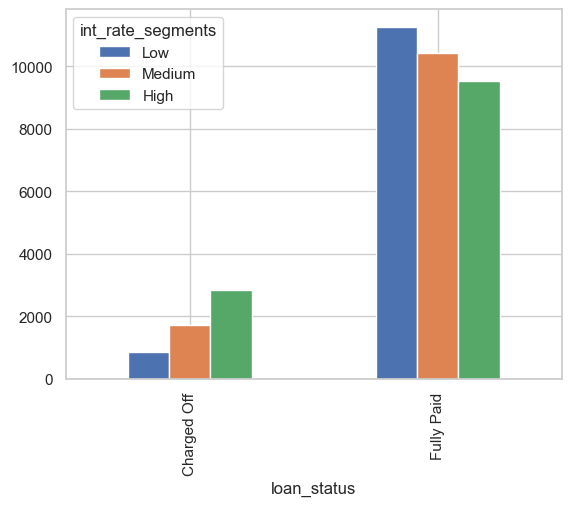

In [238]:
df_defaulter.groupby('loan_status')['int_rate_segments'].value_counts().unstack().plot(kind='bar')
plt.show()

In [239]:
#### Looking at the above graph, we can say that people with lower incomes tend to default the loans and higher income customer generally pay off the loans.

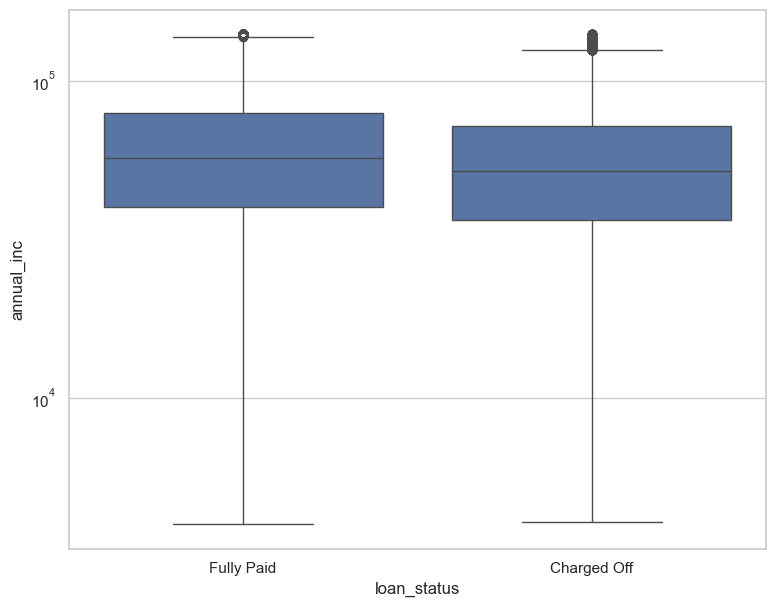

In [240]:
# Plotting the graph between Loan_Status and Annual Income

plt.figure(figsize=[9,7])
sns.boxplot(data=df_defaulter, x="loan_status", y="annual_inc")
plt.yscale("log")
plt.show()

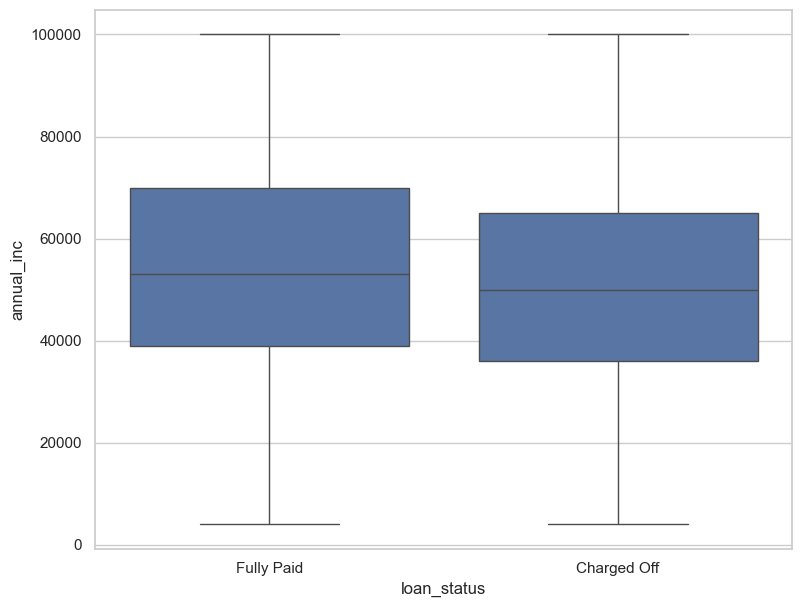

In [241]:

# Removing all the datapoints where annual_inc > 10**5

df_defaulter = df_defaulter[df_defaulter['annual_inc'] < 100000]

# Plotting again after removing the outliers

plt.figure(figsize=[9,7])
sns.boxplot(data=df_defaulter, x="loan_status", y="annual_inc")
plt.show()

#### Higher income applicants tend to fully pay off the loans

<Figure size 3000x2000 with 0 Axes>

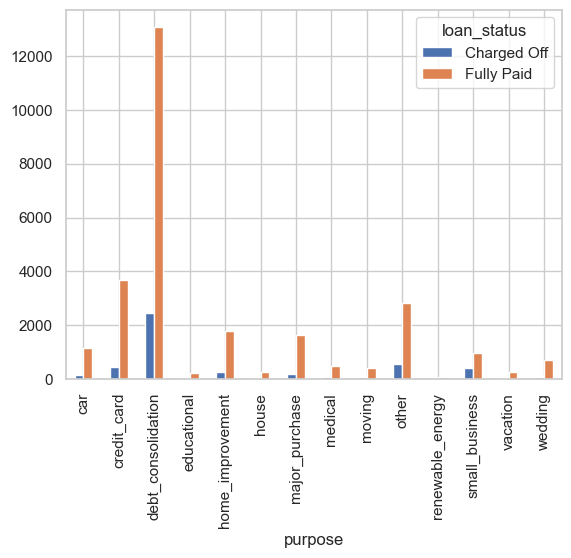

In [243]:
# Plotting the graph between Loan_Status and Purpose of the loan

plt.figure(figsize=(30,20))
df_defaulter.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

<Figure size 3000x2000 with 0 Axes>

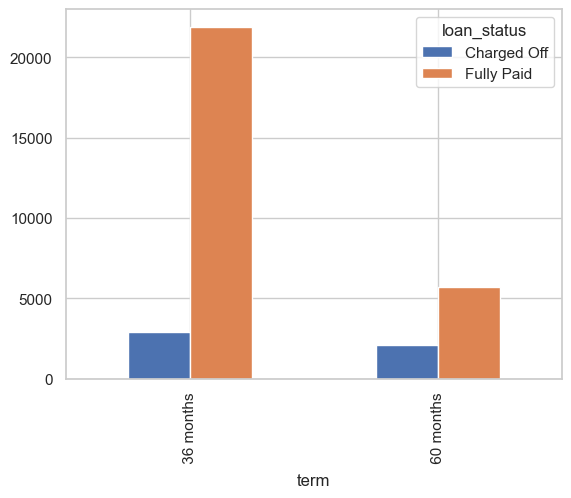

In [244]:
# Plotting the graph between Loan_Status and term of the loan

plt.figure(figsize=(30,20))
df_defaulter.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

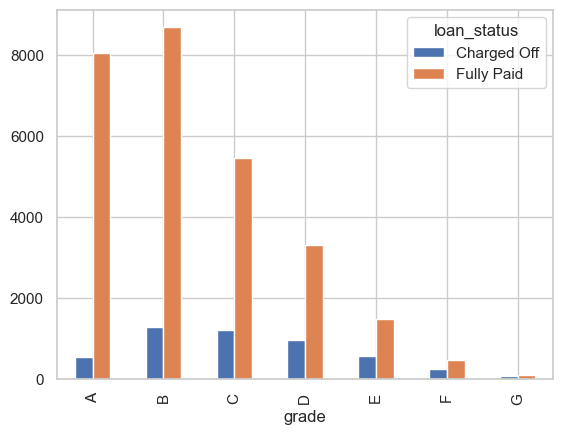

In [245]:
# Plotting the graph between Loan_Status and Grade

plt.figure(figsize=(6,4))
df_defaulter.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

<Figure size 3000x2000 with 0 Axes>

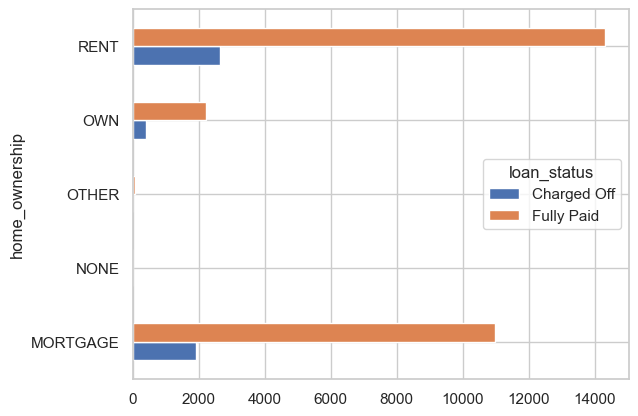

In [246]:
# Plotting the graph between Loan_Status and Home Ownership of the borrower

plt.figure(figsize=(30,20))
df_defaulter.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='barh')
plt.show()

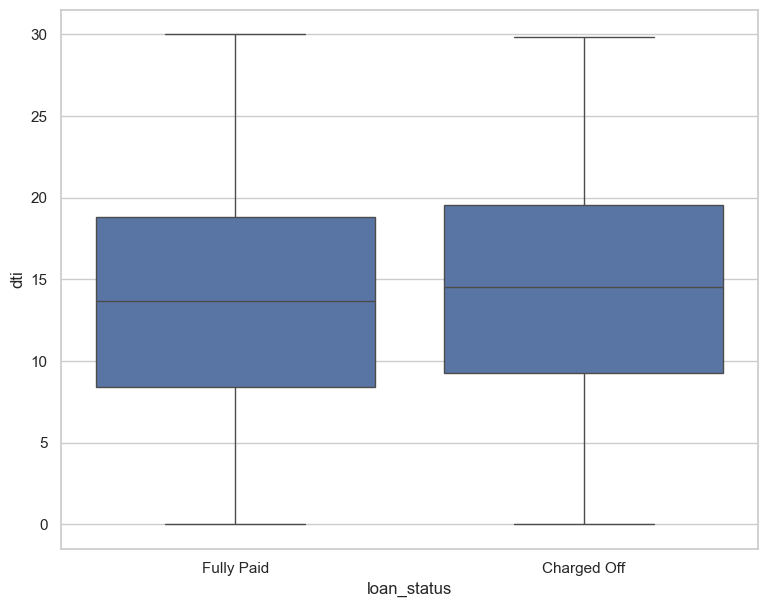

In [247]:
# Plotting the graph between Loan_Status and DTI

plt.figure(figsize=[9,7])
sns.boxplot(data=df_defaulter, x="loan_status", y="dti")
plt.show()

# Bivariate Analysis

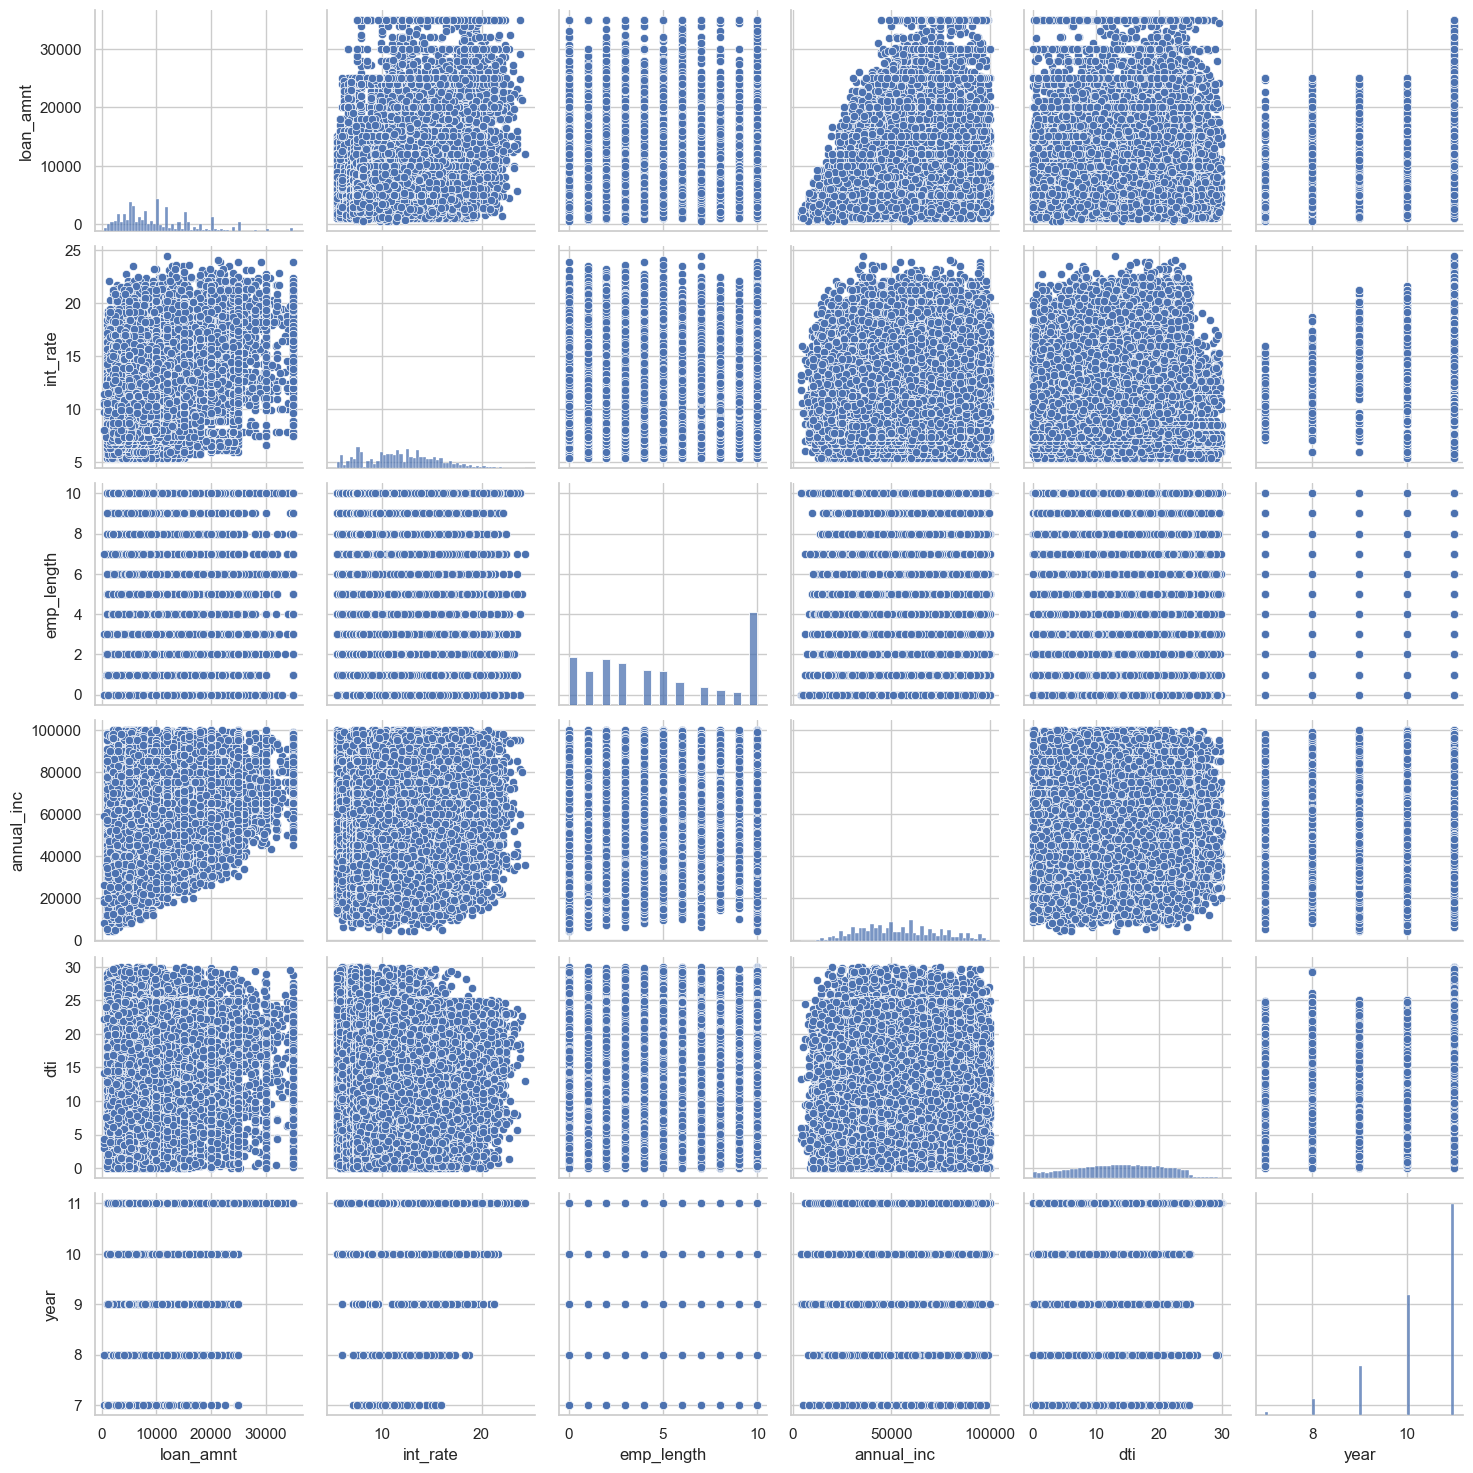

In [249]:
# Plotting a pairplot 
sns.pairplot(df_defaulter)

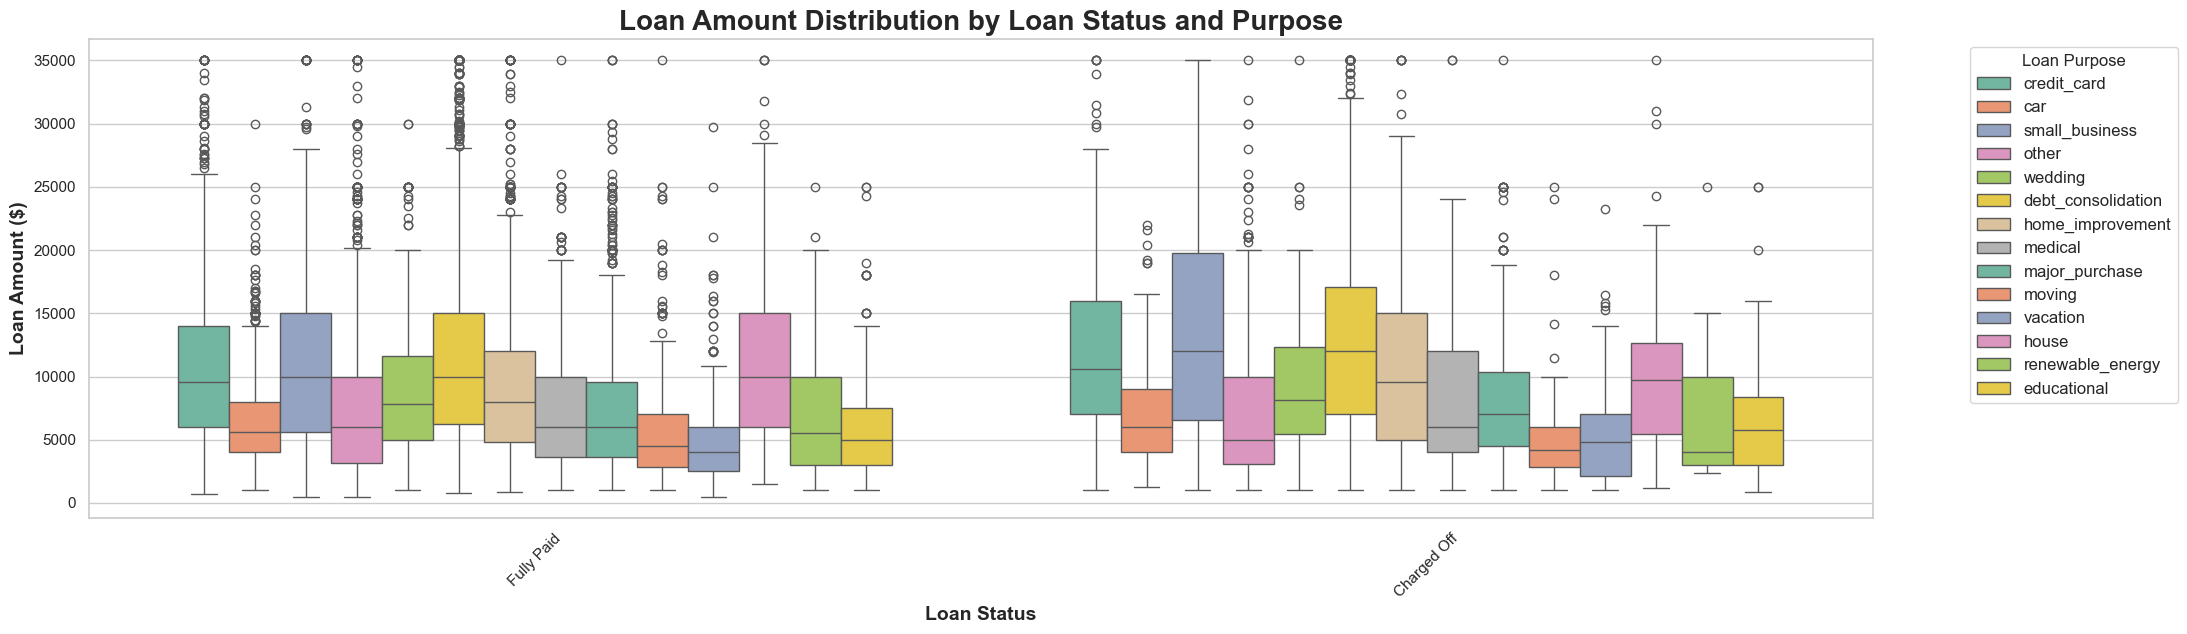

In [250]:
# Set a style for the plot
sns.set_style("whitegrid")

# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the figure and plot
plt.figure(figsize=[22, 6.5])
sns.boxplot(data=df_defaulter, x="loan_status", y="loan_amnt", hue='purpose', palette=custom_palette)

# Customize axis labels and title
plt.title('Loan Amount Distribution by Loan Status and Purpose', fontsize=20, weight='bold')
plt.xlabel('Loan Status', fontsize=14, weight='bold')
plt.ylabel('Loan Amount ($)', fontsize=14, weight='bold')

# Customize the legend
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

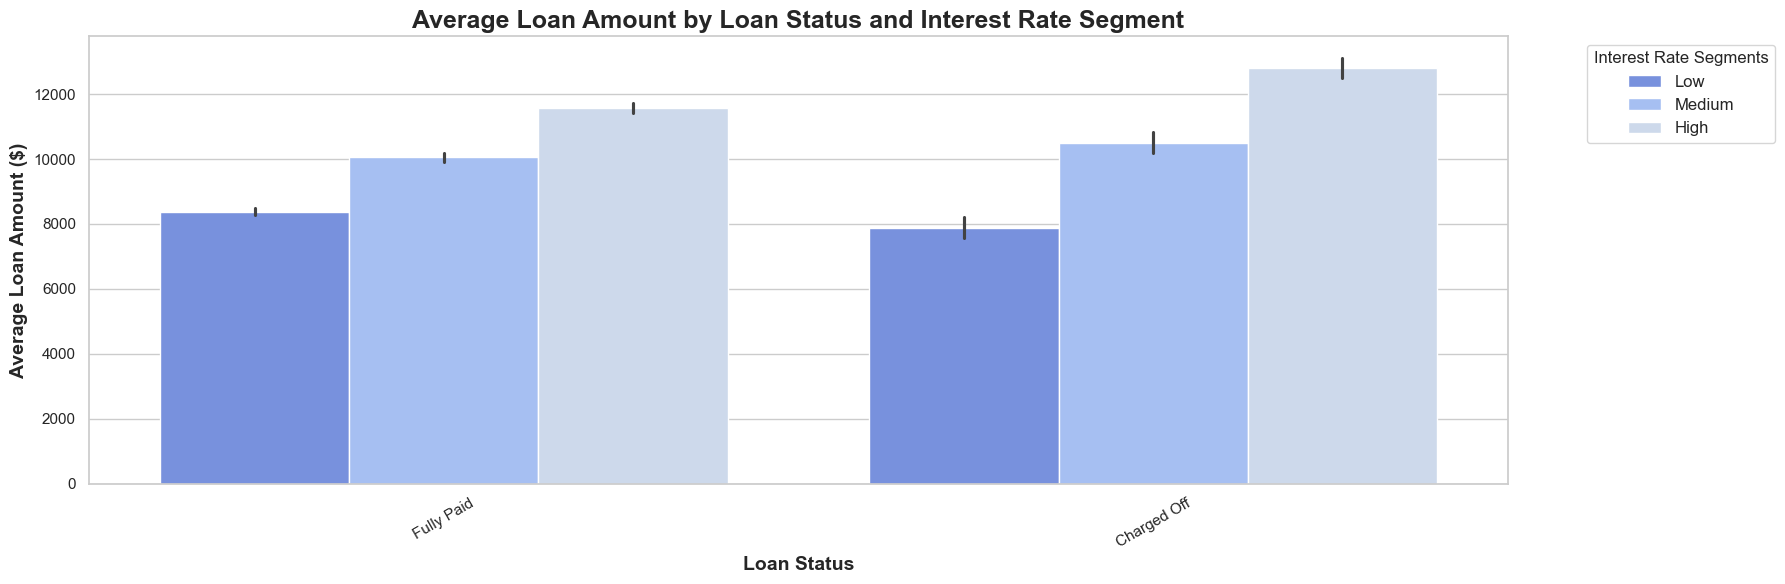

In [251]:
sns.set_style("whitegrid")

# Set a custom color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=False)

# Create the barplot with customizations
plt.figure(figsize=[18, 6])
sns.barplot(data=df_defaulter, x="loan_status", y="loan_amnt", hue='int_rate_segments', palette=custom_palette)

# Customize axis labels and title
plt.title('Average Loan Amount by Loan Status and Interest Rate Segment', fontsize=18, weight='bold')
plt.xlabel('Loan Status', fontsize=14, weight='bold')
plt.ylabel('Average Loan Amount ($)', fontsize=14, weight='bold')

# Customize the legend
plt.legend(title='Interest Rate Segments', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=30)

# Display the plot
plt.tight_layout()
plt.show()